# Annotating spectra with spot-intensity

---

**Updated on:** 2023-09-15

> Author(s): Simon Knoblauch (simon.knoblauch@student.uni-tuebingen.de)  
> Input file(s): .mzML file to be annotated, .csv file containing list of spots
> Output file(s): .mzML file containing annotated MS1 Spectra
> Dependencies: pandas, numpy, matplotlib, ipympl, pathlib, pyopenms

**Please read the comments before proceeding to run the code and let us know if you run into any errors or find undocumented pieces of code.**

In [276]:
import pyopenms as oms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipympl
from pyopenms.plotting import plot_spectrum
from pathlib import Path
%matplotlib widget

## User Input

In [277]:

mzml_filepath=Path(r"C:\Users\Nomis\OneDrive\Documents\2_Master\5_Labrotations\AK Petras\NEHLA_1_neg_13.mzML")
spotlist_filepath=Path(r"output\output_concat.csv")
outputfolder=Path(r"output")

intensity_scalingfactor=10e6
spot_mz=1000

In [278]:
exp=oms.MSExperiment()
oms.MzMLFile().load(mzml_filepath.as_posix(),exp)

spots=pd.read_csv(spotlist_filepath,index_col=0)

In [279]:
spots["RT"]=np.linspace(0,960,len(spots))

In [280]:
spec_list=[]
for spectrum in exp:
    if spectrum.getMSLevel()==1:
        rt_val=spectrum.getRT()
        prev_spot=spots[spots["RT"]<rt_val].iloc[-1]
        
        try:        
            next_spot=spots[spots["RT"]>rt_val].iloc[0]
        except:
            next_spot=prev_spot
        
        interp_intensity=np.interp(rt_val,[prev_spot["RT"],next_spot["RT"]],[prev_spot["spot_intensity"],next_spot["spot_intensity"]])
        peak_mz=np.append(spectrum.get_peaks()[0],spot_mz)
        peak_int=np.append(spectrum.get_peaks()[1],interp_intensity*intensity_scalingfactor)
             
        spectrum.set_peaks((peak_mz,peak_int))
    
    spec_list.append(spectrum)

exp.setSpectra(spec_list)

In [281]:
if not outputfolder.exists():
    outputfolder.mkdir()

output_filename=outputfolder/Path(mzml_filepath.name.split(".")[0]+"_spotint.mzML")
oms.MzMLFile().store(output_filename.as_posix(),exp)

1


<Axes: xlabel='m/z', ylabel='Intensity'>

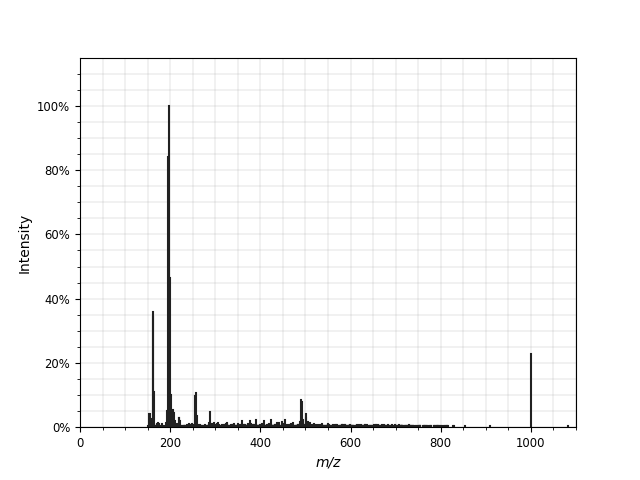

In [282]:
test=5004

print(exp[test].getMSLevel())

fig,ax=plt.subplots()
plot_spectrum(exp[test])